# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [17]:
import pandas as pd
from palmerpenguins import load_penguins
import numpy as np
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#rename penguins dataset
penguins = load_penguins()
#drop NA
penguins = penguins.dropna()

#categorical dummify
cat_transform = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("dummy", OneHotEncoder())
])

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [26]:
#numeric transformer (standardize)
num_transform = Pipeline([
    ("scalar", StandardScaler())
])

#column transformer (apply the dummification)
ct = ColumnTransformer([
    ('num', num_transform, make_column_selector(dtype_include=np.number)),
    ("cat", cat_transform, make_column_selector(dtype_include=object))
])

#predictor and response variables
X = penguins.drop(columns=['bill_depth_mm'])
y = penguins['bill_depth_mm']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#linear regression pipeline
pipeline_lr = Pipeline(
    [("preprocessor", ct),
     ("regressor", LinearRegression())]
     )

#knn pipeline 3 clusters
pipeline_knn3 = Pipeline(
    [("preprocessor", ct),
     ("kNN", KNeighborsRegressor(n_neighbors=3))]
)

#knn pipeline 100 clusters
pipeline_knn100 = Pipeline(
    [("preprocessor", ct),
     ("kNN", KNeighborsRegressor(n_neighbors=100))]
)

#decision tree pipeline
pipeline_tree = Pipeline(
    [("preprocessor", ct),
     ("decision", DecisionTreeRegressor())]
)

In [27]:
#fit the models
pipeline_lr.fit(X_train, y_train)
pipeline_knn3.fit(X_train, y_train)
pipeline_knn100.fit(X_train, y_train)
pipeline_tree.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x14def7c50>),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('dummy',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x14de58260>)])),
                ('decision', DecisionTreeRegressor())])

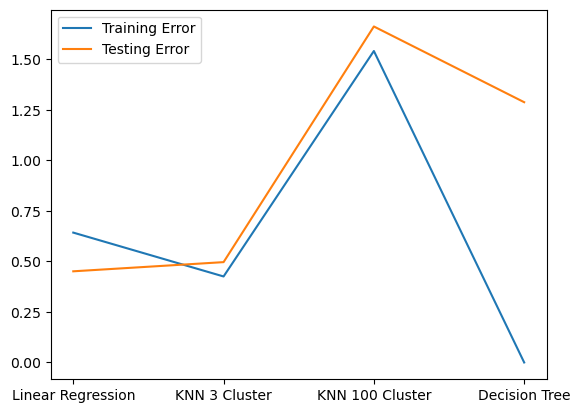

In [28]:
#calculate training and test error
train_error_lr = mean_squared_error(y_train, pipeline_lr.predict(X_train))
test_error_lr = mean_squared_error(y_test, pipeline_lr.predict(X_test))

train_error_knn3 = mean_squared_error(y_train, pipeline_knn3.predict(X_train))
test_error_knn3 = mean_squared_error(y_test, pipeline_knn3.predict(X_test))

train_error_knn100 = mean_squared_error(y_train, pipeline_knn100.predict(X_train))
test_error_knn100 = mean_squared_error(y_test, pipeline_knn100.predict(X_test))

train_error_dt = mean_squared_error(y_train, pipeline_tree.predict(X_train))
test_error_dt = mean_squared_error(y_test, pipeline_tree.predict(X_test))

train_errors = [train_error_lr, train_error_knn3, train_error_knn100, train_error_dt]
test_errors = [test_error_lr, test_error_knn3, test_error_knn100, test_error_dt]

#plotting
x = range(1, 5)
plt.plot(x, train_errors, label='Training Error')
plt.plot(x, test_errors, label='Testing Error')
plt.xticks(ticks=x, labels=['Linear Regression', 'KNN 3 Cluster', 'KNN 100 Cluster', 'Decision Tree'])
plt.legend()
plt.show()

The best model is the KNN 3 Cluster model (lowest training and testing error).